In [1]:
from pathlib import Path
import os
SRC=os.path.join(Path.cwd().parent, 'src')
import sys
sys.path.append(SRC)
from Topology import TopologyGenerator
from ChromatinDynamics import ChromatinDynamics
import openmm.unit as unit
import numpy as np
from Utilities import gen_structure, compute_RG, SaveStructure


In [2]:
generator = TopologyGenerator()
generator.gen_top([200])


In [3]:
sim = ChromatinDynamics(generator.topology, 'test', output_dir=f'{Path.cwd()}/output')

2025-04-12 08:10:52,658 | INFO | ChromatinDynamics | ************************************************************
2025-04-12 08:10:52,659 | INFO | ChromatinDynamics |                      Chromatin Dynamics                     
2025-04-12 08:10:52,659 | INFO | ChromatinDynamics | ************************************************************
2025-04-12 08:10:52,660 | INFO | ChromatinDynamics | Storing output in /Users/sb95/Library/CloudStorage/Box-Box/Research_current/ChromatinDynamics/notebooks/output
2025-04-12 08:10:52,660 | INFO | ChromatinDynamics | System initialized with 200 particles.
2025-04-12 08:10:52,661 | WARNING | Platforms | Requested platform 'CUDA' not found. Available platforms: Reference, CPU, OpenCL. Defaulting to CPU.
2025-04-12 08:10:52,661 | INFO | ChromatinDynamics | force_field_manager initialized. Use this to add forces to the system before setting up simulation.
2025-04-12 08:10:52,662 | INFO | ChromatinDynamics | -----------------------------------------------

In [4]:
# sim.force_field_manager.add_default_forces(mode='gauss')
sim.force_field_manager.add_harmonic_bonds()
sim.force_field_manager.removeCOM()
sim.force_field_manager.add_self_avoidance()


2025-04-12 08:10:53,071 | INFO | Forcefield | Adding 199 harmonic bonds with parameters:
2025-04-12 08:10:53,072 | INFO | Forcefield | length: 1.0, spring constant (k): 10.0, group: 0
2025-04-12 08:10:53,073 | INFO | Forcefield | HarmonicBonds force successfully added to system.
2025-04-12 08:10:53,073 | INFO | Forcefield | --------------------------------------------------
2025-04-12 08:10:53,074 | INFO | Forcefield | Adding CMMotionRemover with frequency: 100 and force group: 31
2025-04-12 08:10:53,075 | INFO | Forcefield | CMMRemover force successfully added to system.
2025-04-12 08:10:53,075 | INFO | Forcefield | --------------------------------------------------
2025-04-12 08:10:53,076 | INFO | Forcefield | Adding Self-avoidance force with parameters:
2025-04-12 08:10:53,076 | INFO | Forcefield | Ecut=4.0, k_rep=5.0, r_rep=1.0, cutoff=3.0, group=2
2025-04-12 08:10:53,077 | INFO | Forcefield | SelfAvoidance force successfully added to system.
2025-04-12 08:10:53,077 | INFO | Forcef

In [5]:
sim.simulation_setup(init_struct='randomwalk',save_pos=False, save_energy=True)

2025-04-12 08:10:53,800 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-04-12 08:10:53,801 | INFO | Integrators | Valid integrators: ['langevin', 'brownian', 'active-brownian']| Selected: langevin
2025-04-12 08:10:53,802 | INFO | Integrators | LangevinIntegrator: temperatute=120.0 | friction=0.1 | timestep=0.01
2025-04-12 08:10:53,805 | INFO | ChromatinDynamics | Setting up context...
2025-04-12 08:10:53,805 | INFO | Utilities | Random walk created. Position shape: (200, 3)
2025-04-12 08:10:53,806 | INFO | ChromatinDynamics | Simulation set up complete!
2025-04-12 08:10:53,806 | INFO | ChromatinDynamics | ------------------------------------------------------------------------------------------------------------------------
2025-04-12 08:10:53,806 | INFO | ChromatinDynamics | Index  Force Class                    Force Name           Group    Particles    Bonds        Exclusions   P.E./Particle       
2025-04-12 08:10:53,807 | INFO | Chrom

In [6]:
for i in range(10):
    if i==5:
        sim.energy_reporter.pause()
    #     sim.simulation.reporters[-1].close()
    #     sim.simulation.reporters.pop(-1)
    if i==7:
        sim.energy_reporter.resume()
    #     sim.simulation.reporters.append(SaveStructure("output/positions2.cndb", reportInterval=1000,))
        
    sim.run(2000)
# sim.simulation.reporters[-1].close()

2025-04-12 08:10:54,993 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-04-12 08:10:54,994 | INFO | ChromatinDynamics | Running simulation for 2000 steps...
2025-04-12 08:10:55,799 | INFO | ChromatinDynamics | Completed 2000 steps in 0.80s (2489 steps/s)
2025-04-12 08:10:55,799 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-04-12 08:10:55,800 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-04-12 08:10:55,800 | INFO | ChromatinDynamics | Running simulation for 2000 steps...
2025-04-12 08:10:56,575 | INFO | ChromatinDynamics | Completed 2000 steps in 0.77s (2582 steps/s)
2025-04-12 08:10:56,575 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-04-12 08:10:56,575 | INFO | ChromatinDynamics | ------------------------------------------------------------
2025-04-12 08:10:56,575 | INFO | ChromatinDynamics | R

In [8]:
sim.simulation.integrator.getTemperature().value_in_unit(unit.kelvin)

600.0

In [15]:
np.random.randint(100_000)

20165

In [9]:
import h5py


In [11]:
pos = h5py.File('output/sumi_positions.cndb', 'r')
print(pos.keys())

<KeysViewHDF5 ['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '16', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52

In [12]:
pos['0'].shape


(500, 3)

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


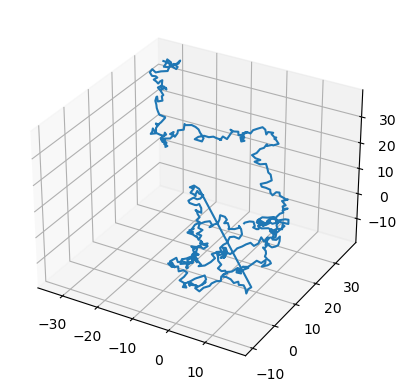

In [36]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n=str(np.random.randint(0,90))
ax.plot(pos[n][:,0], pos[n][:,1], pos[n][:,2])

In [37]:
for atom in generator.topology.atoms():
    print(atom.element)

A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
